# 转换并匹配

In [1]:
import os
import pandas as pd
from utils import dropun, pre_process, Pdf2Txt, has_alpha

pdf = os.listdir('core_qmof_pdf')

In [2]:
pdf

['anie.200906322.pdf',
 'acs.cgd.5b00040.pdf',
 's10904-008-9199-7.pdf',
 'b508574h.pdf',
 'nchem.684.pdf',
 '15533174.2013.771664.pdf',
 'a909754f.pdf',
 'c0cc05547f.pdf',
 '15533174.2013.865228.pdf',
 's2053229614008407.pdf',
 'j.inoche.2012.04.027.pdf',
 'b925546j.pdf',
 'c5dt04687d.pdf',
 'c3cc45689g.pdf',
 'cm101410h.pdf',
 'anie.201307074.pdf',
 'chem.200305098.pdf',
 'c5ce00833f.pdf',
 'c6tc00244g.pdf',
 'c3ce42048e.pdf',
 'j.ica.2013.02.016.pdf',
 'j.micromeso.2010.12.016.pdf',
 's1600536804021944.pdf',
 'j.ica.2009.12.026.pdf',
 'b922732f.pdf',
 'cg500975j.pdf',
 'cl.1990.1531.pdf',
 'c7sc00449d.pdf',
 'cg300440t.pdf',
 'j.molstruc.2016.04.093.pdf',
 'ic4024844.pdf',
 'anie.200602556.pdf',
 'c4ra13501f.pdf',
 'b804956d.pdf',
 'ja0100468.pdf',
 'j.molstruc.2006.11.065.pdf',
 'cg301413u.pdf',
 'j.inoche.2011.06.017.pdf',
 'c3ce42189a.pdf',
 'cg500751e.pdf',
 'c2cc37497h.pdf',
 'j.poly.2012.04.012.pdf',
 'ic0301268.pdf',
 'anie.200390153.pdf',
 'anie.201503636.pdf',
 'c6ce02122k.

## pdf转换为txt/html

### 使用pdfminer转换

无法转换的记作`inconvertible`

转换结束后进行初步的预处理：

1. 删除空行，将没结尾的句子连接到前一段（首字母大写英文单词结尾除外）
2. **不应该出现中文字符等特殊符号** （这个不一定，也难以判断，暂时不采用）
3. 不应该出现单行数字（或单行不含英文字符串）
4. txt的长度明显短于pdf的长度，下面三种情况说明pdf是加密过/无权限的，这里将长度设置为1000

```
Unauthenticated
Download Date | 5/1/19 7:57 AM

 - 10.1515/zna-1970-0309
Downloaded from De Gruyter Online at 09/12/2016 08:39:51AM

Copyright of Acta Crystallographica: Section E (International Union of Crystallography -
IUCr) is the property of International Union of Crystallography - IUCr and its content may
not be copied or emailed to multiple sites or posted to a listserv without the copyright holder's
express written permission. However, users may print, download, or email articles for
individual use.
```

In [3]:
path = 'core_qmof_pdf/'
dest = 'core_qmof_txt_pdfminer/'
if not os.path.exists(dest):
    os.mkdir(dest)

for pdf in os.listdir(path):
    name = pdf[:-4] + '.txt'
    s = path + pdf
    d = dest + name
    if os.path.exists(d):
        continue
    try:
        s = Pdf2Txt(s)
        s = pre_process(s)
        with open(d, 'w', encoding='utf-8') as f:
            f.write(s)
    except:
        print(pdf, 'failed')

(sici)1521-3773(19990115)38_1_2_140__aid-anie140_3.0.co;2-9.pdf failed
10.1107_s1600536809032115.pdf failed
10.14102_j.cnki.0254-5861.2011-1072.pdf failed
.stats_cache failed
s1600536810002539.pdf failed
10.3866_pku.whxb201206123.pdf failed
pku.whxb201206123.pdf failed
10.14102_j.cnki.0254-5861.2011-1040.pdf failed
j.cnki.0254-5861.2011-1040.pdf failed
j.cnki.0254-5861.2011-1180.pdf failed
(sici)1521-3773(19990917)38_18_2730__aid-anie2730_3.0.co;2-9.pdf failed
j.cnki.0254-5861.2011-1072.pdf failed
s160053681205026x.pdf failed
bkcs.2006.27.11.1839.pdf failed
acs.cgd.6b01352.pdf failed
10.14102_j.cnki.0254-5861.2011-1180.pdf failed
s1600536809032115.pdf failed
10.5012_bkcs.2006.27.11.1839.pdf failed


In [4]:
head = 'http://sunie.top:9009/material/convert/core_qmof_pdf/'

### 转换中遇到的问题

![image-20210826100823661](https://gitee.com/sun__ye/gallery/raw/master/img2/20210826100825.png)

使用以上转化的方法会出现一定的乱码，但是这并非转换本身的问题，而是打开txt文件编码的问题，网页默认不使用utf-8打开会乱码，实际上用记事本打开发现效果其实还可以：

> 9 By sharing their
metal  apices  these  tetrahedra  form  a  diamondoid  framework  in
which all metal atoms possess octahedral coordination geometry.
This  feature  is  quite  striking  because  in  most  diamondoid
coordination  frameworks10 the  metal  atoms  usually  have  tetra-
hedral coordination geometry. In the structure Mn1–Mn2 has two
Mn–O–Mn and one M–O–C–O–M bridges while Mn1–Mn3 and
Mn1–Mn4  have  one  Mn–O–Mn  and  two  M–O–C–O–M  bridges.
From a magnetic point of view, the structure is best described as
chains of edge-sharing Mn1 and Mn2 octahedra further connected
by Mn3 and Mn4 octahedra via apex-sharing (Fig. 2, inset). The
Mn1–Mn2 distances are alternately 3.292 and 3.323 Å and the Mn–
O–Mn angles in pairs, 99.4° and 97.8°, and 96.4° and 97.5°. The
Mn1–Mn3 connectivity is 3.625 Å and Mn1–Mn4 3.588 Å with the
Mn–O–Mn angles of 113.1° (Mn3) and 110.4° (Mn4). The apical
Mn–Mn distances are 5.429–5.825 Å.

### 读取txt/html并预处理，记录到df

在此步骤中，验证一下txt转换的效果是否出现乱码

In [5]:
df = dropun(pd.read_csv('../Merge/core_qmof704.csv'))
dois = set(df['doi'])
df = df.set_index('doi')

In [6]:
# dest = 'core_qmof_txt'
dest = 'core_qmof_html'
suffix = '.html'

list_ = []  # 在dest文件夹下存在的txt/html

for f in os.listdir(dest):
    d = dest + '/' + f
    name = f[:-len(suffix)]
    if name in dois:
        print(name)
        list_.append(name)

ic1025087not in dois
molecules20058941
j.inoche.2016.01.019
c3dt51203g (2)not in dois
ic5021302
j.inoche.2010.04.015
b915889h
ic051707v (2)not in dois
cg401452p
cg100078bnot in dois
s1600536805014625
c2ce25859e
acs.jpcc.5b02359
s0108768100010004
a909754f (2)not in dois
ic049030j (2)not in dois
cl.130514not in dois
cg3008443
j.cnki.0254-5861.2011-0517
c6sc00972g
c5dt00011d
ic0507060 (2)not in dois
chem.201100350
b812402g
ic701628f
c4qi00138a (2)not in dois
c3ce40565f
ic701628f (2)not in dois
cg101435bnot in dois
ic800854y
chem.201001179not in dois
b806616g
c4dt02047b (2)not in dois
c3dt53415d
c4dt02047bnot in dois
ic400940w
ic034846q
j.jssc.2016.04.021
s1600536809038756
c2dt31844j
c3ce42553cnot in dois
zaac.200800158
ic401657d
c2dt31090bnot in dois
c3ce42454enot in dois
ic2021929 (2)not in dois
c2cc34006b
c4ra01269k (2)not in dois
cg500371n
c3dt32861a (2)not in dois
cryst2030974
c3ce26684b (2)not in dois
cg201025unot in dois
cg5010616
j.inoche.2012.04.036
anie.201410459
c0dt00390e
ejic.

In [7]:
len(list_)

697

In [8]:
valid = []
for doi in dois:
    if doi + suffix in os.listdir(dest):
        with open(dest + '/' + doi + suffix, 'r', encoding='utf-8') as f:
            s = f.read()
        df.loc[doi, suffix[1:]] = s
        valid.append(doi)
    else:
        print(doi)

1521-3749(200102)627:2%3c131::aid-zaac131%3e3.3.co;2-r
cg401601d
acs.inorgchem.6b01845
(sici)1521-3773(19990917)38:18%3c2730::aid-anie2730%3e3.3.co;2-0
cg401935z
(sici)1521-3773(19990115)38:1
acs.inorgchem.5b01364


### 其他转换方式

1. 使用SDK也能批量转换pdf，https://www.docsdk.com/docAPI , 但是，价格不便宜，1元/页
2. 使用Adobe Acrobat自带的转换也能将pdf转成word或者html，并且看起来转换的效果相当好，最大程度的保留了原文的格式。

以序号0的第一篇为例：
- 转换的所有文件：http://sunie.top:9009/index.php?dir=/material/convert/test
- 转换得到的html：http://sunie.top:9009/material/convert/test/b404485a.html

![image-20210826140213714](https://gitee.com/sun__ye/gallery/raw/master/img2/20210826140215.png)

这种方式的好处是转换成html之后方便高亮关键词从而适合读者去标注。


## 字符串匹配

704篇core_qmof且论文材料1:1的数据，其中有693篇实际存在pdf，转换成txt得到688篇（5篇转换失败）

首先使用[参见列表](https://shimo.im/sheets/NJkbEv9gznTJjyqR/6Whyt)对txt进行全字匹配，即**不做任何语法语义分析**，而是单纯做字符串匹配。

In [9]:
common_list = pd.read_csv('common_list.csv', encoding="gbk").drop(list(range(32,44)))
metal = common_list['金属前驱体名称']

def transform(s):
    return ''.join(filter(str.isalnum, s.lower())) 

In [10]:
import numpy as np
all_field = []
for col in common_list.columns:
    field = set(common_list[col])
    field.discard(np.NAN)
    all_field += field

In [11]:
def match(s, pattern):
    '''对文本s匹配正则表达式或字符串pattern，给出文章计数'''
    return s.count(pattern)

def match_lower(s, pattern):
    """不计大小写的计数"""
    return s.lower().count(pattern.lower())

def match_alpha(s, pattern):
    """仅考虑字母和数字，过滤其他一切字符"""
    return transform(s).count(transform(pattern))

直接完全匹配金属前驱体名称，只有两篇出现。为了得到更全面的数据，不妨使用所有字段进行匹配

In [12]:
def parse(doi, mat):
    """使用match函数定义的匹配方法，对doi对应的txt文件进行全文字符串匹配"""
    global df
    s = df.loc[doi, suffix[1:]]
    for col in common_list.columns:
        df.loc[doi, col] = 0
        field = set(common_list[col])
        field.discard(np.NAN)
        for m in field:
            c = mat(s, m)
            if c:
                df.loc[doi, col] += c
    return df.loc[doi]

In [13]:
def parse_all(mat):
    """使用match函数定义的匹配方法，匹配所有txt文件，并返回匹配描述符（每一列包括count, mean, std, max四个描述）"""
    global df
    for doi in valid:
        parse(doi, mat)
    des = df.describe().drop(['min', '25%', '50%', '75%'])
    des.loc['count'] = df[df!=0].count()
    des = des[list(common_list.columns)]
    print(des)
    return des

In [14]:
pd.set_option('display.max_columns', None)

des1 = parse_all(match)

        金属前驱体名称      金属分子式     有机配体名称   有机配体分子式        配体简称        溶剂名称  \
count  2.000000  21.000000  53.000000  1.000000  489.000000  127.000000   
mean   0.010043   0.032999   0.187948  0.001435   23.777618    0.317073   
std    0.230347   0.194172   0.917877  0.037878   36.466221    0.962611   
max    6.000000   2.000000  14.000000  1.000000  541.000000   12.000000   

            溶剂分子式       添加剂名称      添加剂化学式    水热法/溶剂热法       微波法         超声法  \
count  589.000000  143.000000  399.000000  339.000000  2.000000  390.000000   
mean    35.302726    0.520803    2.414634    1.542324  0.005739    2.626973   
std     62.676797    1.503802    3.414214    2.838316  0.107057    3.794471   
max    520.000000   15.000000   23.000000   39.000000  2.000000   29.000000   

            搅拌合成法  precipitation  
count  470.000000     118.000000  
mean     3.030129       0.502152  
std      3.829027       2.399787  
max     25.000000      36.000000  


In [15]:
des2 = parse_all(match_lower)

         金属前驱体名称       金属分子式     有机配体名称   有机配体分子式         配体简称        溶剂名称  \
count  20.000000  159.000000  60.000000  1.000000   691.000000  653.000000   
mean    0.047346    0.365854   0.269727  0.001435   207.878049   15.208034   
std     0.431247    0.828469   1.203020  0.037878   215.574595   15.586376   
max    10.000000    7.000000  14.000000  1.000000  1577.000000  100.000000   

             溶剂分子式       添加剂名称      添加剂化学式    水热法/溶剂热法       微波法         超声法  \
count   637.000000  153.000000  443.000000  447.000000  2.000000  417.000000   
mean    110.319943    0.556671   18.091822    2.252511  0.005739   17.879484   
std     137.632160    1.555492   23.131003    3.358288  0.107057   23.845524   
max    1220.000000   15.000000  177.000000   40.000000  2.000000  226.000000   

            搅拌合成法  precipitation  
count  498.000000     124.000000  
mean    19.671449       0.549498  
std     24.530879       2.567072  
max    199.000000      39.000000  


In [16]:
des3 = parse_all(match_alpha)

         金属前驱体名称       金属分子式     有机配体名称   有机配体分子式         配体简称        溶剂名称  \
count  20.000000  174.000000  63.000000  1.000000   692.000000  653.000000   
mean    0.047346    0.434720   0.302726  0.001435   235.053085   15.387374   
std     0.431247    0.931011   1.442940  0.037878   229.136770   15.716755   
max    10.000000    7.000000  22.000000  1.000000  1700.000000  100.000000   

             溶剂分子式       添加剂名称      添加剂化学式    水热法/溶剂热法       微波法         超声法  \
count   687.000000  169.000000  501.000000  459.000000  2.000000  420.000000   
mean    122.493544    0.601148   19.588235    2.370158  0.005739   19.106169   
std     145.986272    1.601507   24.607868    3.428351  0.107057   25.585560   
max    1289.000000   15.000000  201.000000   40.000000  2.000000  259.000000   

            搅拌合成法  precipitation  
count  513.000000     124.000000  
mean    21.302726       0.549498  
std     26.548349       2.567072  
max    211.000000      39.000000  


可以看出，对于（金属、溶剂）分子式的匹配数量要远远大于前驱体名称的匹配。但普遍来说，这种全字匹配的方式都过于严苛，难以找到真正的X。


### 完全一致

![image-20210812173655270](https://gitee.com/sun__ye/gallery/raw/master/img2/20210812174537.png)


### 忽略大小写

![image-20210812173610456](https://gitee.com/sun__ye/gallery/raw/master/img2/20210812173633.png)

对于部分命名（如有机配体名称、配体简称、溶剂名称），完全一致与忽略大小写差别显著，但另外一些（如金属分子式、溶剂分子式）基本上两者一致。

### 删除特殊字符

https://www.delftstack.com/zh/howto/python/remove-special-characters-from-string-python/

去掉所有特殊符号，只留下数字和字母，稍微比之前的方法高一点，但没有显著提升。

![image-20210812174447070](https://gitee.com/sun__ye/gallery/raw/master/img2/20210812174534.png)

### 方法的对比

In [17]:
def create_heatmap(heat, subtitle):
    import seaborn as sns
    import matplotlib.pyplot as plt
    import math
    # matplotlib.use('Agg')
    # os.system('echo "backend: Agg" > ~/.config/matplotlib/matplotlibrc')
#     plt.rc('font', family='SimHei', size=7)
    plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
    plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
    f, ax = plt.subplots(figsize=(20, 5), nrows=1)
    plt.suptitle(subtitle, y=0.1, size=18)
    ax.xaxis.set_ticks_position('top')
    ax.yaxis.set_ticks_position('left')

    ax.tick_params(axis='x', labelsize=18)
    ax.tick_params(axis='y', labelsize=18)
    # ax.tick_params(axis='x', labelsize=16)
    m = max(heat.max())
    sns.heatmap(heat.applymap(lambda x:math.sqrt(x)), ax=ax, cbar=False, linewidths=0.1, fmt='g', annot=heat, annot_kws={'fontsize': 18}, cmap="YlGnBu")
    plt.xticks(rotation=45)  # 45为旋转的角度
    plt.yticks(rotation=45)

In [18]:
def draw_heatmap(loc):
    count = pd.DataFrame(columns=des1.columns)
    count.loc['完全一致'] = des1.loc[loc]
    count.loc['忽略大小写'] = des2.loc[loc]
    count.loc['仅字符数字'] = des3.loc[loc]

    create_heatmap(count, 'count')

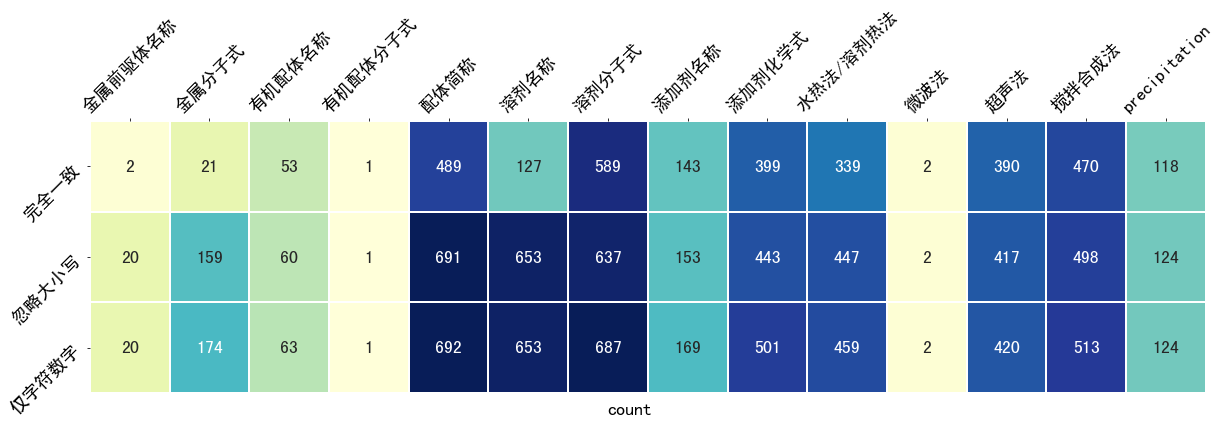

In [19]:
draw_heatmap('count')

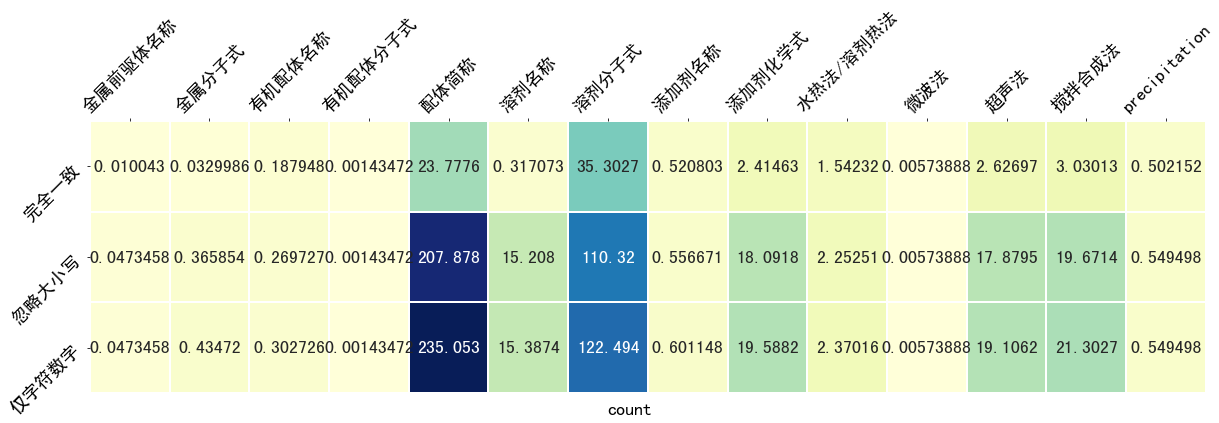

In [20]:
draw_heatmap('mean')

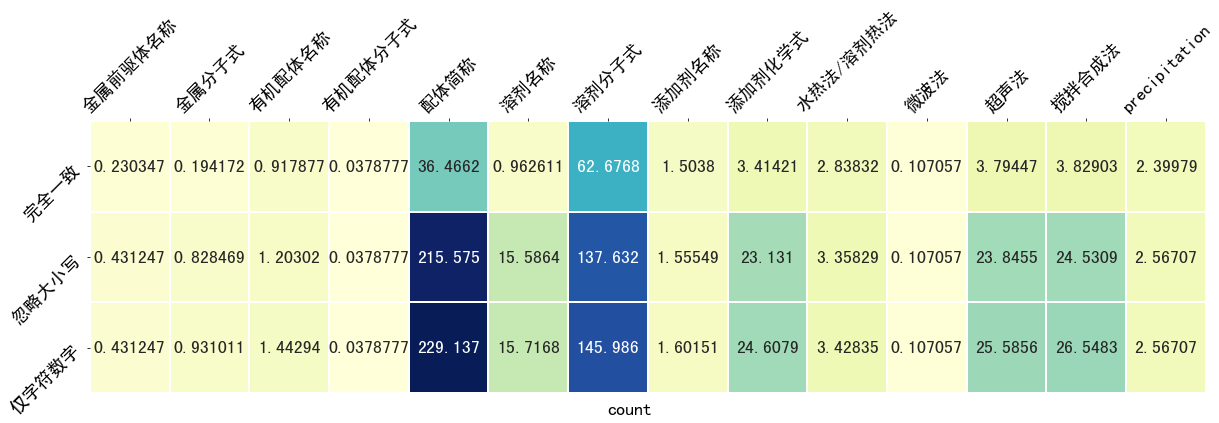

In [21]:
draw_heatmap('std')

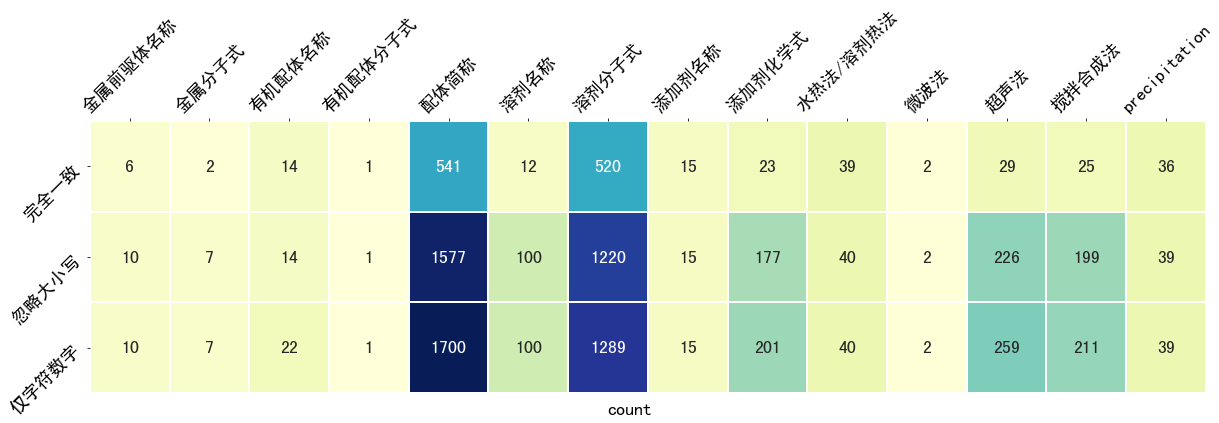

In [22]:
draw_heatmap('max')

## 模糊匹配

1. 顺序匹配，空格的考虑
2. 在原有的字符串上增添、删除、修改部分字符进行匹配？

entity_recognition 实体识别包：用的过程中再去改善，复杂的情况太多，难以自己去考虑

库：API支持丰富功能

### 模糊匹配 FuzzyWuzzy
FuzzyWuzzy 是一个简单易用的模糊字符串匹配工具包。它依据 Levenshtein Distance 算法，计算两个序列之间的差异。

Levenshtein Distance算法，又叫 Edit Distance算法，是指两个字符串之间，由一个转成另一个所需的最少编辑操作次数。许可的编辑操作包括将一个字符替换成另一个字符，插入一个字符，删除一个字符。一般来说，编辑距离越小，两个串的相似度越大。

In [23]:
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

In [24]:
fuzz.ratio("this is a test", "this is a test!")

97

In [25]:
fuzz.ratio("N-dimethylacetamide", "N,N-Dimethylacetamide")

90

In [26]:
fuzz.ratio("Photochemical", "sonochemical")

80

### 命名实体识别 nltk

“专名识别”，是指识别文本中具有特定意义的实体，主要包括人名、地名、机构名、专有名词等。通常包括两部分：（1）实体边界识别；（2） 确定实体类别（人名、地名、机构名或其他）。


NLTK 被称为“使用 Python 进行计算语言学教学和工作的绝佳工具”和“使用自然语言进行游戏的惊人库”。

![](http://www.nltk.org/_images/tree.gif)

nltk官网： http://www.nltk.org/
nltk安装： https://blog.csdn.net/shuihupo/article/details/81541334

安装（下载过程需要验证ssl,通过下面disable掉）：
```
import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download()
```

下载过程出现Error reading from server: HTTP Error 404: Not Found，改为`nltk.download('all', halt_on_error=False)`

只能去github下载： https://github.com/nltk/nltk_data/tree/gh-pages

zip文件备份在：http://sunie.top:9009/Server/files/nltk_data-gh-pages.zip

安装步骤：

```
unzip nltk_data-gh-pages.zip 
cd nltk_data-gh-pages/
mv packages nltk_data
cd nltk_data/
# find . -name "*.zip" | xargs -n1 unzip   无效，会解压到最外文件夹
find -name '*.zip' -exec sh -c 'unzip -d "${1%/*}" "$1"' _ {} \;
```

In [27]:
# -*- coding: utf-8 -*- 
import nltk
import pprint

In [28]:
from nltk import data
if "/Server/files/nltk_data-gh-pages/nltk_data" not in data.path:
    data.path.append("/Server/files/nltk_data-gh-pages/nltk_data")
print(data.path)

['/root/nltk_data', '/root/anaconda3/envs/jupyter/nltk_data', '/root/anaconda3/envs/jupyter/share/nltk_data', '/root/anaconda3/envs/jupyter/lib/nltk_data', '/usr/share/nltk_data', '/usr/local/share/nltk_data', '/usr/lib/nltk_data', '/usr/local/lib/nltk_data', '/Server/files/nltk_data-gh-pages/nltk_data']


<!DOCTYPE html><!--[if IE]>  <html class="ie"> <![endif]-->
<html>
	<head>
		<meta charset="utf-8" />
		<title>
		</title>
		
	<STYLE>
sup {
	vertical-align: baseline;
	position: relative;
	top: -0.4em;
}
sub {
	vertical-align: baseline;
	position: relative;
	top: 0.4em;
}
a:link {text-decoration:none;}
a:visited {text-decoration:none;}
@media screen and (min-device-pixel-ratio:0), (-webkit-min-device-pixel-ratio:0), (min--moz-device-pixel-ratio: 0) {.stl_view{ font-size:10em; transform:scale(0.1); -moz-transform:scale(0.1); -webkit-transform:scale(0.1); -moz-transform-origin:top left; -webkit-transform-origin:top left; } }
.layer { }.ie { font-size: 1pt; }
.ie body { font-size: 12em; }
@media print{.stl_view {font-size:1em; transform:scale(1);}}
.grlink { position:relative;width:100%;height:100%;z-index:1000000; }
.stl_01 {
	position: absolute;
	white-space: nowrap;
}
.stl_02 {
	font-size: 1em;
	line-height: 0.0em;
	width: 49.58333em;
	height: 64.91666em;
	border-style: none;
	display
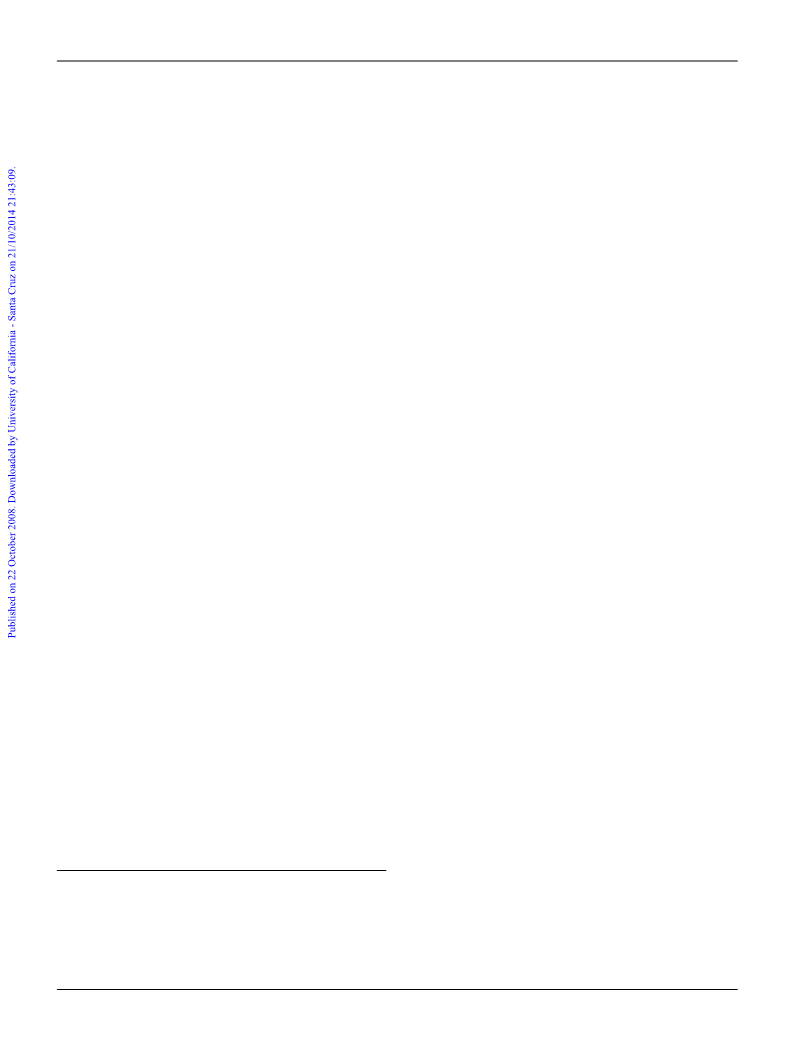
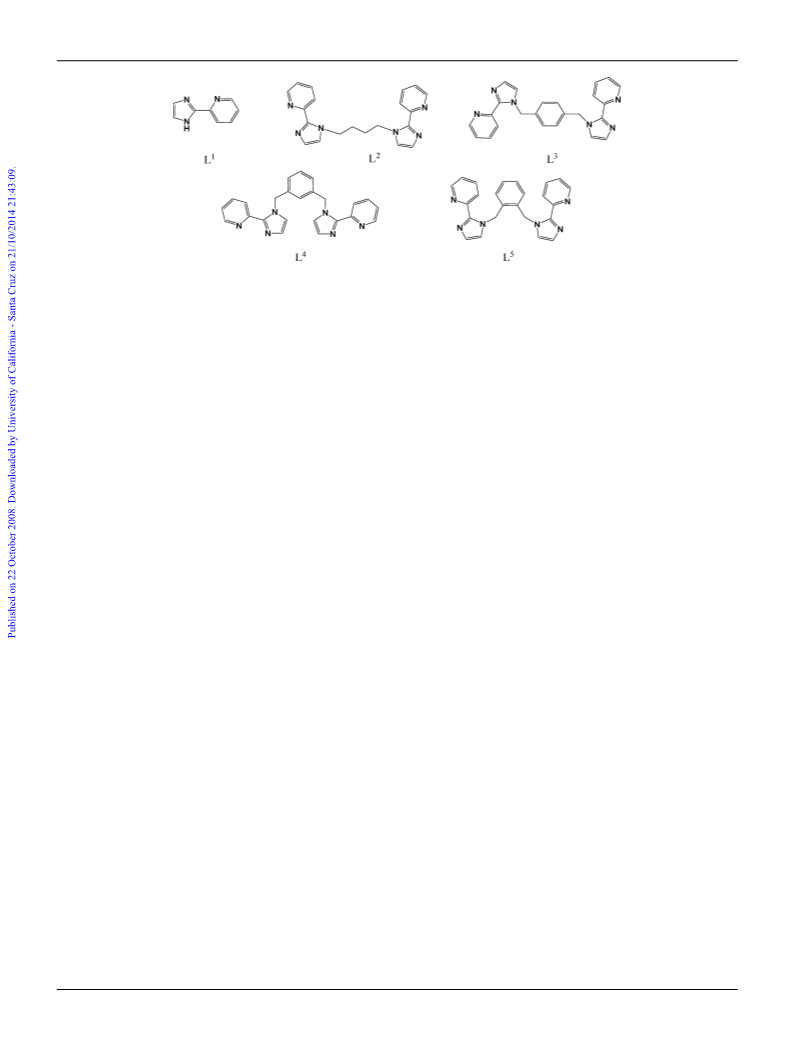
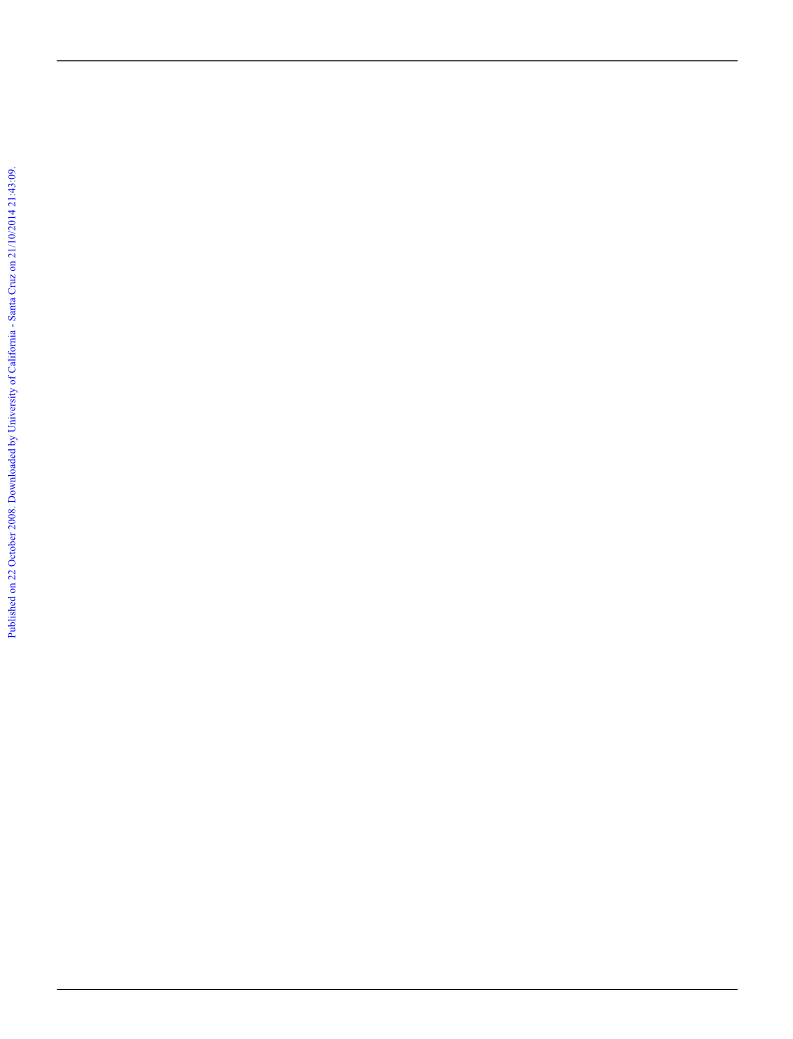
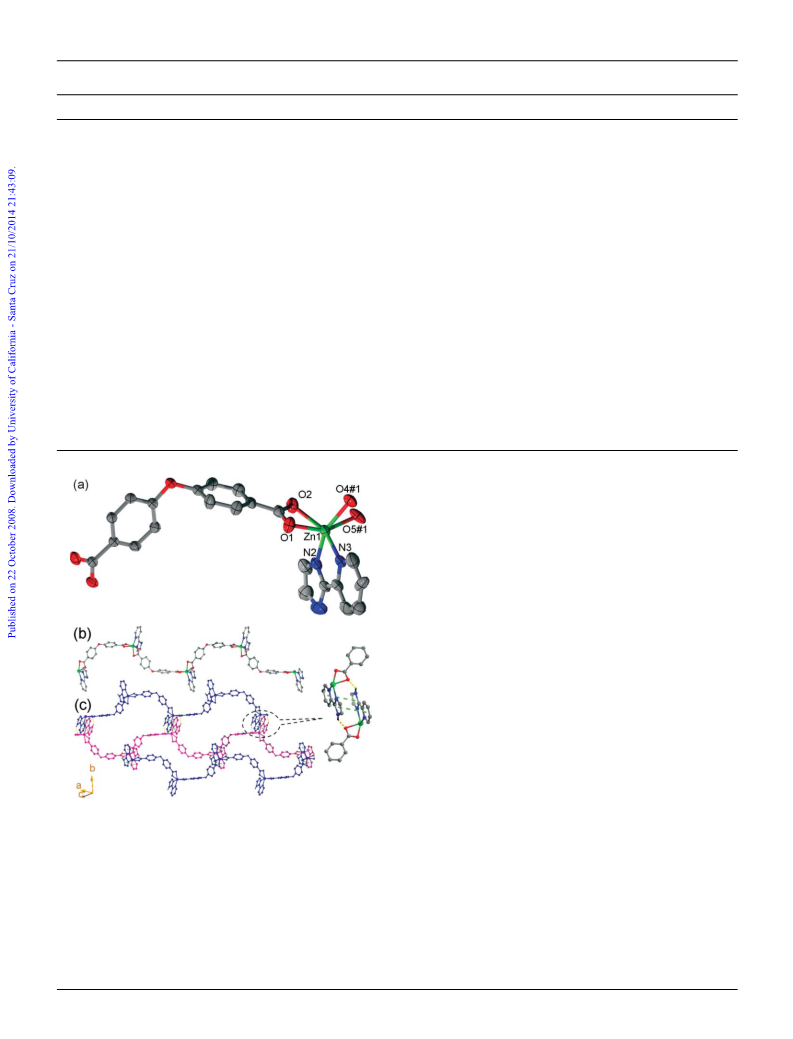
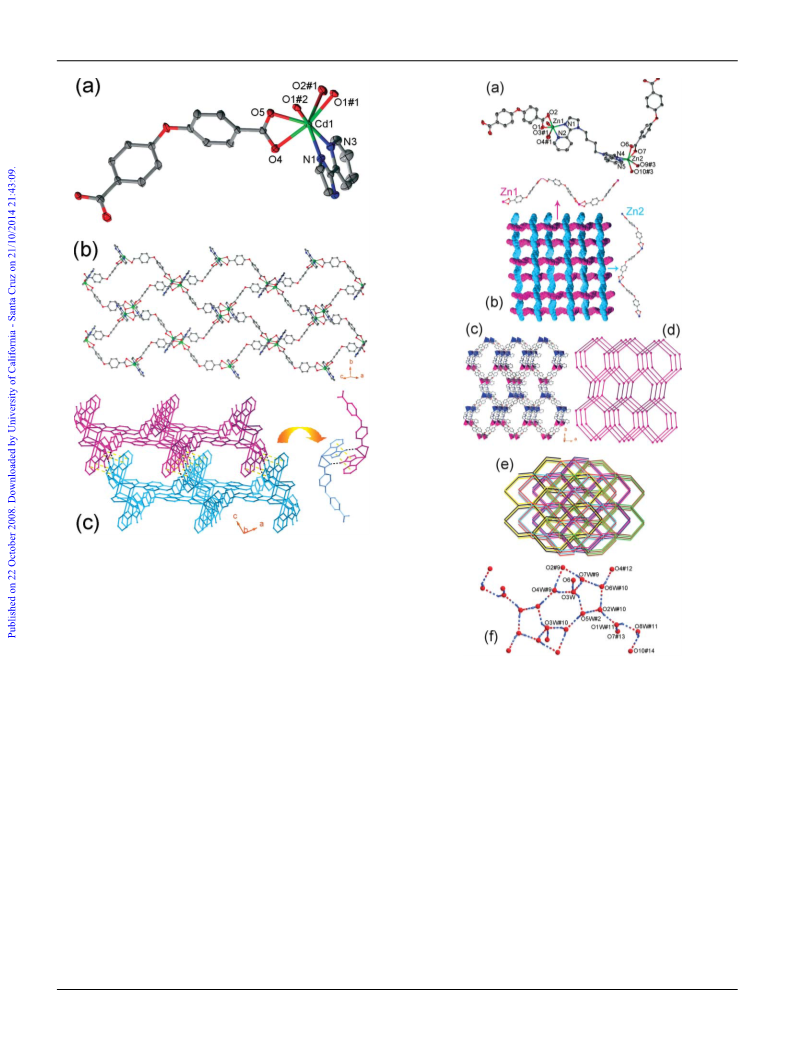
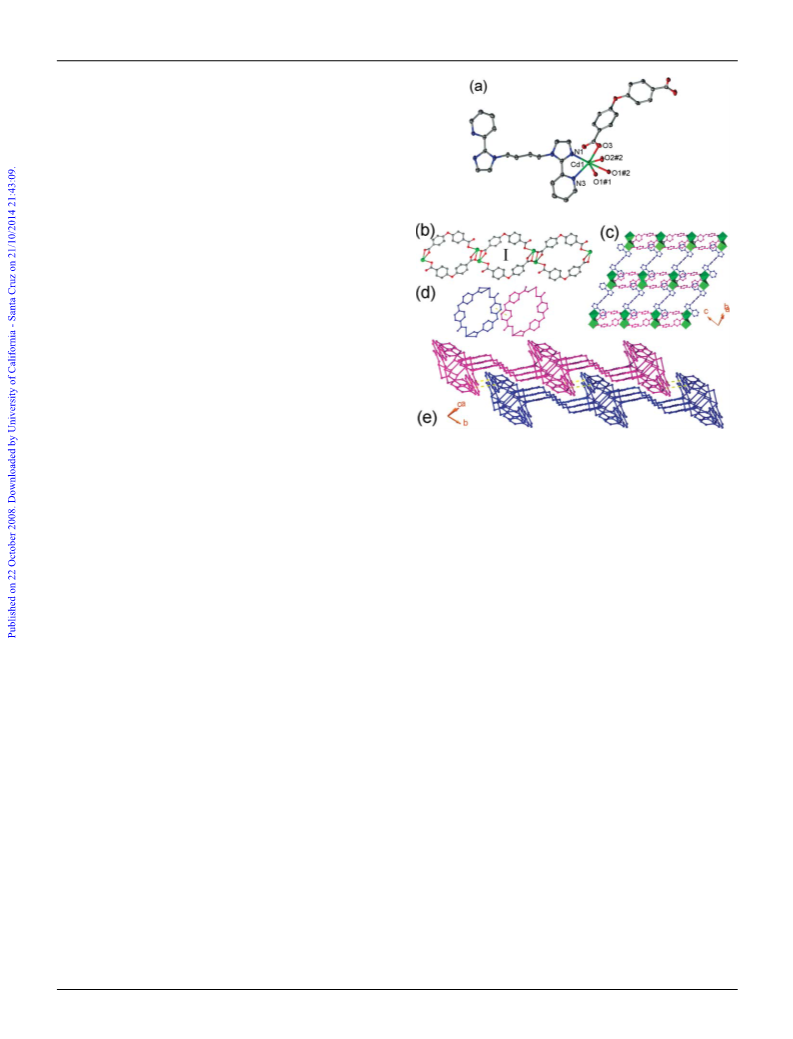
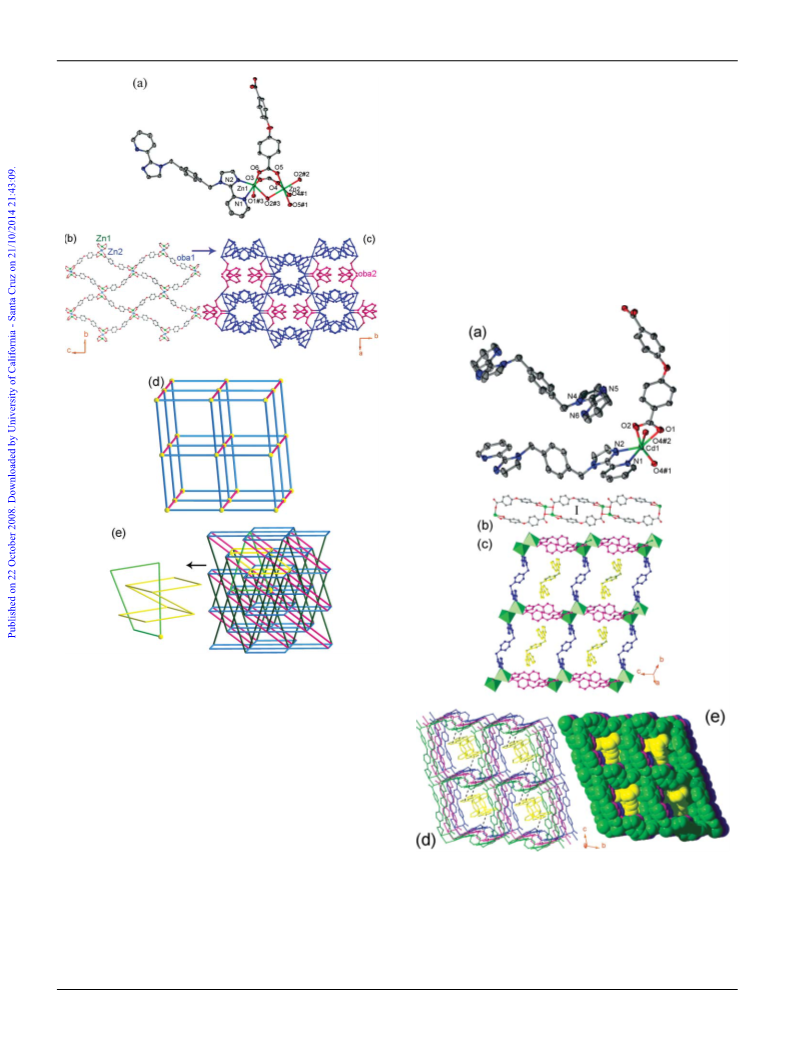
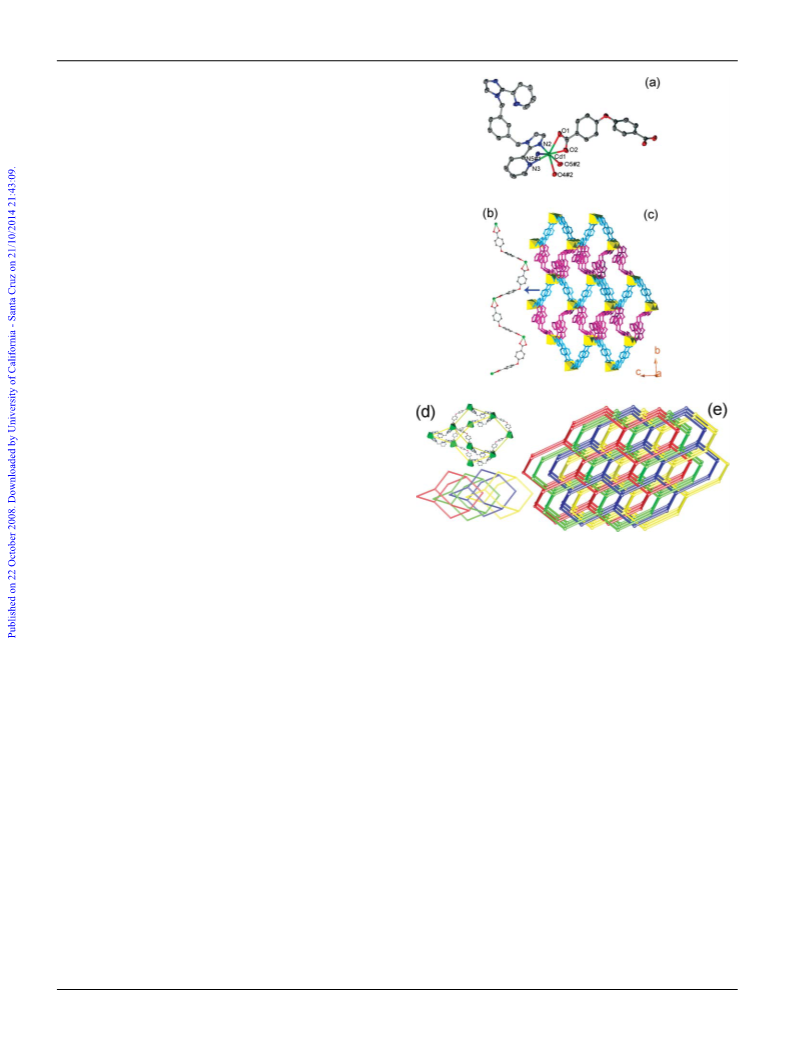
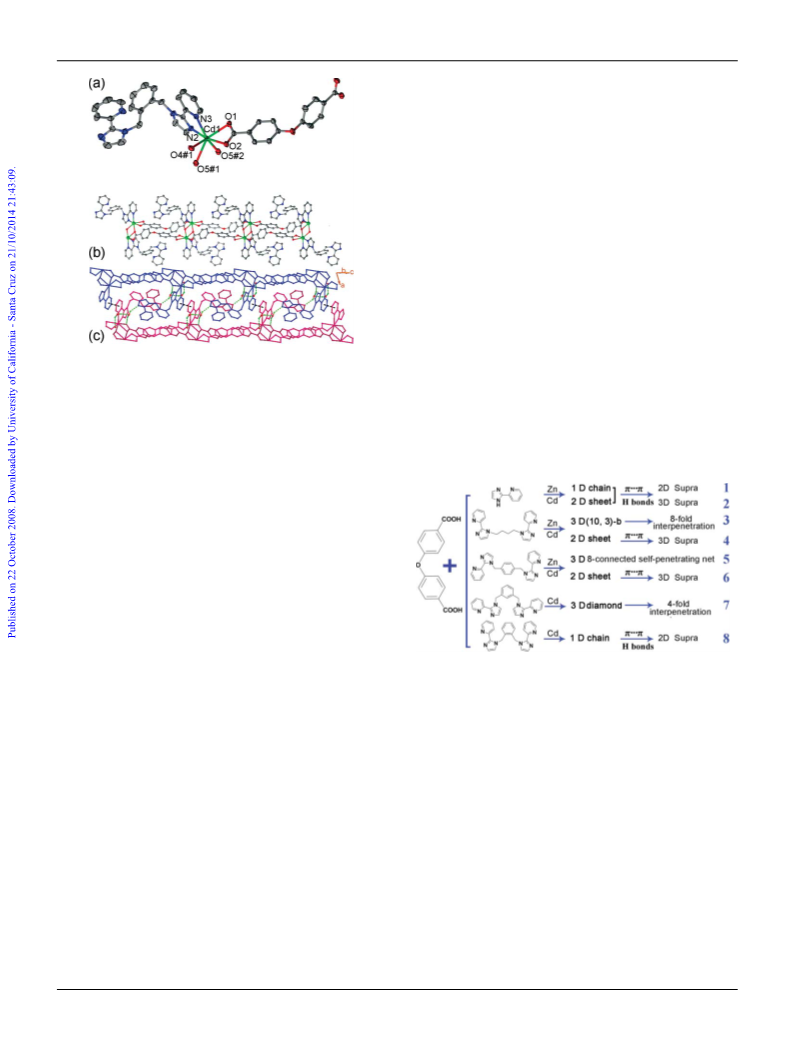
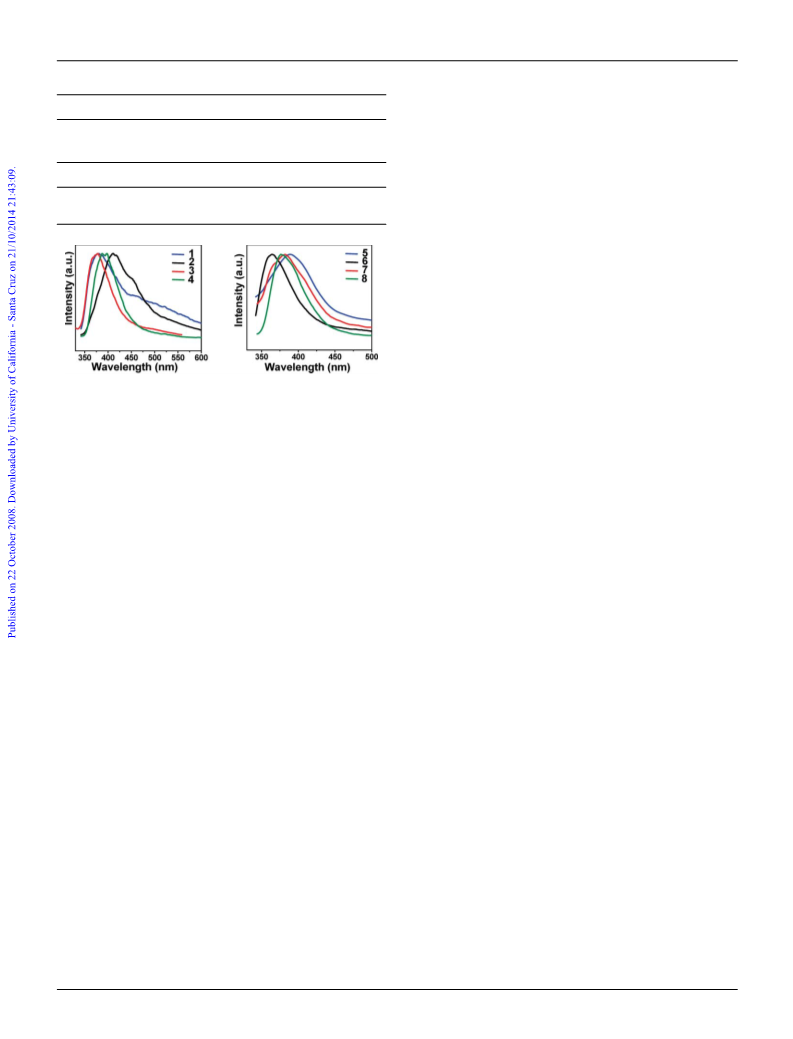
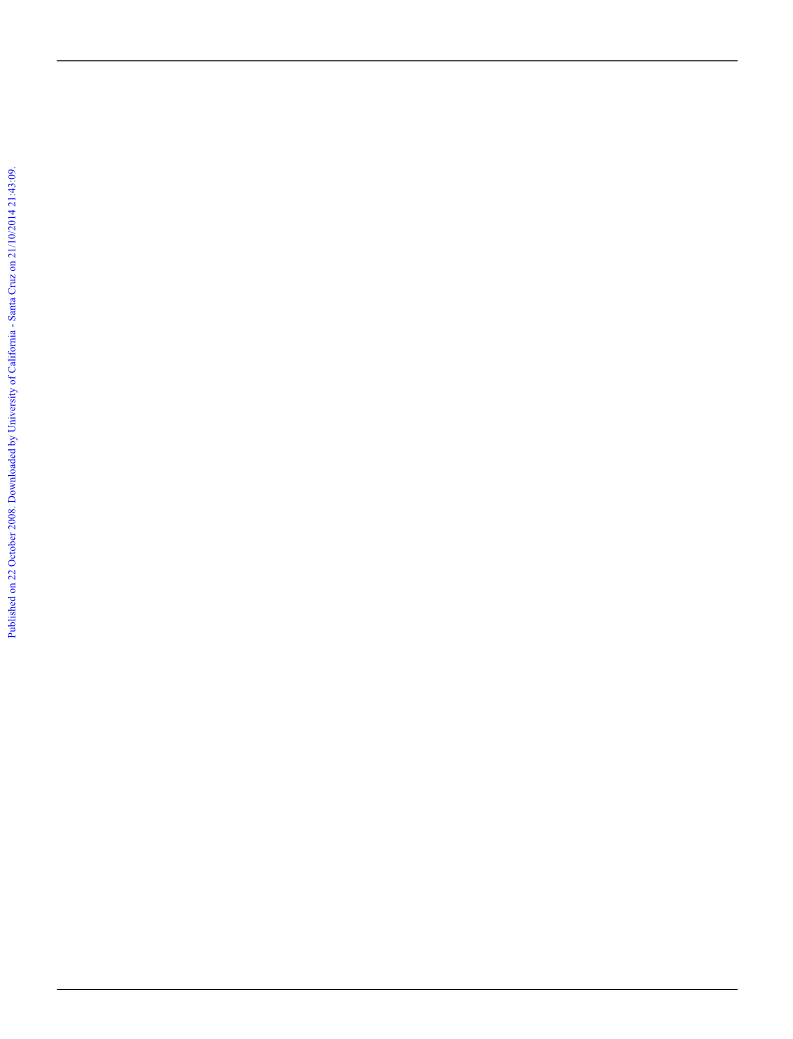
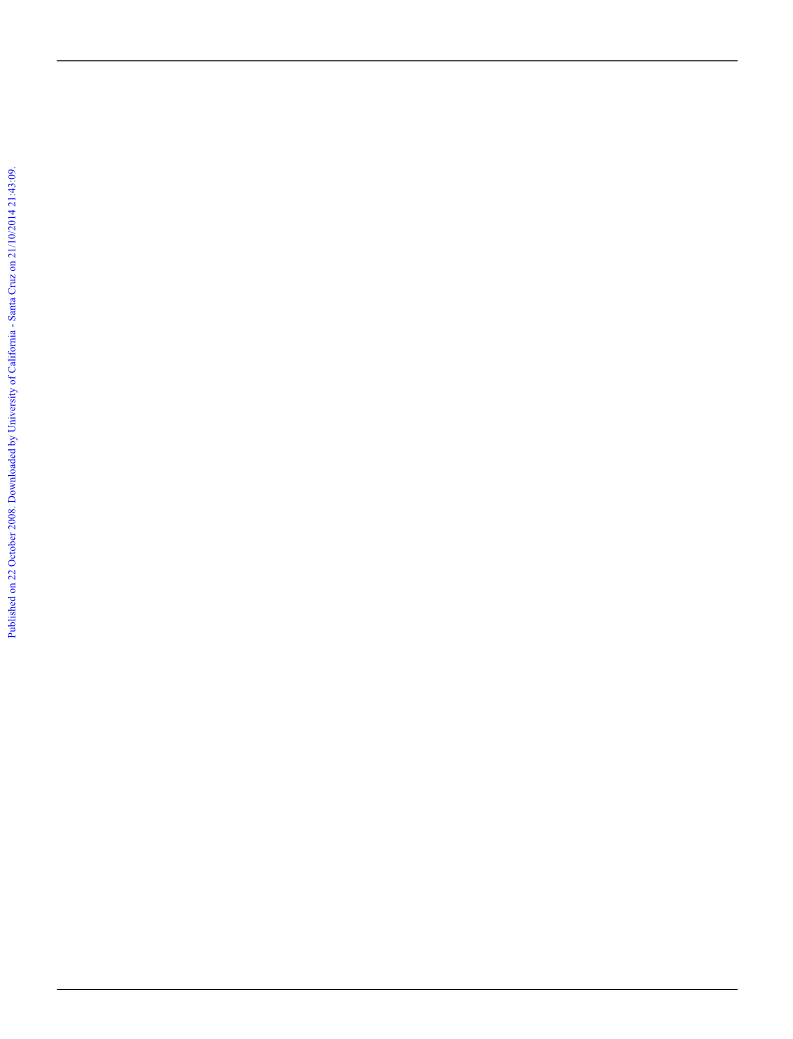

In [30]:
text = "Mexico quakes with joy over World Cup upset win.Mexico’s Earthquake Early Warning and Monitoring System issued a message on the 17th that the Mexican team played against the German team in the World Cup. During the first half of the game until the 35th minute, the Mexican team striker Losano broke the deadlock and scored the first goal, scoring a goal in Mexico. The city monitored minor earthquakes. This monitoring system analyzes that the earthquake was caused by man-made methods or caused by many people excitedly jumping when scoring."

doi = valid[0]
s = df.loc[doi, suffix[1:]]
print(s)

In [31]:
en = {} 
tokenized = nltk.word_tokenize(s) #分词
print(tokenized)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [32]:
tagged = nltk.pos_tag(tokenized)         #词性标注 
print(tagged)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [33]:
chunked = nltk.ne_chunk(tagged)          #命名实体识别 
print(chunked)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



NN 名词 year,home, costs, time, education

NNS 名词复数 undergraduates scotches

NNP 专有名词 Alison,Africa,April,Washington

NNPS 专有名词复数 Americans Americas Amharas Amityvilles

### 实体模糊匹配

In [34]:
def get_Noun(s):
    en = {} 
    tokenized = nltk.word_tokenize(s) #分词
    tagged = nltk.pos_tag(tokenized)         #词性标注 
    chunked = nltk.ne_chunk(tagged)          #命名实体识别 
    Noun = set()
    for line in chunked:
        if line[-1][0] == 'N':  # 只要是名词都尝试一下
            if has_alpha(line[0]) and line[0][0] != '/':
                Noun.add(line[0])
    return Noun

nltk识别出来的专有名词还是过于零碎，难以直接用于匹配，可能因为：
1. pdfminder转换成文本效果不佳
2. 分词太短，有的只有两个字母

In [ ]:
for doi in valid[:10]:
    s = df.loc[doi, suffix[1:]]
    print(get_Noun(s))

In [ ]:
count = 0

for doi in valid[:10]:
    s = df.loc[doi, 'txt']
    print(f"---------------doi:{doi}--------------")
    Noun = get_Noun(s)
    for col in common_list.columns:
        field = set(common_list[col])
        field.discard(np.NAN)
        for m in field:
            for word in Noun:
                if fuzz.ratio(word, m) > 70:
                    count += 1
                    print(f'  {word} ---------- {m}')

In [ ]:
count/10

疑问：如何运用模糊匹配+命名实体识别？